Dataset Preview:
   day_of_week  admissions  discharges  previous_occupancy  bed_occupancy
0            1          20          18                 120            121
1            2          25          20                 123            126
2            3          22          19                 121            124
3            4          18          17                 119            120
4            5          21          20                 122            123


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Absolute Error: 1.12
Mean Squared Error: 1.84
Root Mean Squared Error: 1.36


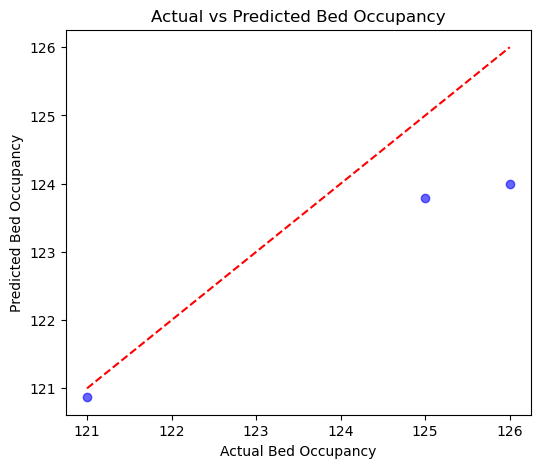

Predicted bed occupancy for given data: 123.51


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset from CSV
file_path = "bed_occupancy.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Display first few rows
print("Dataset Preview:")
print(df.head())

# Features and target
X = df.drop('bed_occupancy', axis=1)  # Independent variables
y = df['bed_occupancy']  # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

# Plot Actual vs Predicted values
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.xlabel("Actual Bed Occupancy")
plt.ylabel("Predicted Bed Occupancy")
plt.title("Actual vs Predicted Bed Occupancy")
plt.show()

# Sample prediction for a new data point
new_data = pd.DataFrame({
    'day_of_week': [5],  # Friday
    'admissions': [22],
    'discharges': [20],
    'previous_occupancy': [121]
})

predicted_occupancy = model.predict(new_data)
print(f"Predicted bed occupancy for given data: {predicted_occupancy[0]:.2f}")